## Implementación de condiciones de borde no homogéneas - Método SOR

MOOC: Transferencia de Calor y Masa Computacional

Módulo 5 - Clase 4

Autora: Dra. Catalina Pino Muñoz 

Editor: Prof. Felipe Huerta

Hola a todos y todas. 

En esta clase, implementaremos el método sobre-relajación sucesiva (SOR) en Python para resolver un problema a los valores de contorno lineal en dos dimensiones con condiciones de borde espacialmente no uniformes.

Primero describiremos el sistema físico de interés y plantearemos el sistema de ecuaciones diferenciales parciales y sus condiciones borde.

Luego, discretizaremos el sistema de ecuaciones y obtendremos la solución de este problema matemático por medio del método SOR. 

Finalmente graficaremos el perfil en el espacio para nuestra variable de interés.

### 1. Descripción del sistema físico - Difusión en dos dimensiones 

La figuras muestran un receptáculo cuadrado en el cual difunde una especie A en una mezcla binaria (A + B). 
En el receptáculo existe una placa solida delgada que contiene un aromatizante (especie A) en el borde inferior. El receptáculo tiene ancho $L_x$ y alto $L_y$. Estudiaremos tres casos:
     
- Caso 1. Inicialmente la placa aromática tiene ancho $L_x$.
- Caso 2. Luego de un tiempo en el que la placa aromática es consumida solo alcanza un ancho $L_x/3$. 
- Caso 3. La tapa del receptáculo (borde superior) esta semi abierta para permitir la entrada de un flujo constante de aroma hacia dentro del receptáculo.  

Otros supuestos y consideraciones del problema son:

- Mezcla binaria de A y B, donde B es un inerte que no reacciona.
- Existe equilibrio sólido-gas entre la placa solida de aromatizante y la concentration de aroma ($c_A^\star$) en el medio gaseoso en contacto con la placa. 
- Las paredes del receptáculo son impermeables.
- Consideramos un termino de fuente negativo (consumo) de aroma, el cual es homogéneo en el interior del dominio cuadrado, $R_A = -Sc_A$.

#### Conservación de masa - Perfil de concentración en estado estacionario
La ecuación diferencial parcial (EDP) que describe el perfil especial de concentración de la especie A en dos dimensiones y en estado estacionario sujeto a una termino de fuente negativo homogéneo es:

$$D_{AB}\left(\frac{\partial^2 c_A}{\partial x^2} + \frac{\partial^2 c_A}{\partial y^2}\right) = S c_A$$

Sujeto a cuatro condiciones de borde (CB), una en cada pared del receptáculo, para cada caso.

<img src="./Fig_cases.png" alt="Alternative text" 
     align="center"
     width="1000"/>

#### Resumen de condiciones de borde

- Caso 1. Placa aromática de ancho $L_x$ en borde inferior

CB1: borde inferior, $ c_A|_{x,y=0} = c_A^\star $ 

CB2: borde derecho, $\frac{\partial c_A}{d x}|_{x=L,y} = 0$

CB3: borde superior, $\frac{\partial c_A}{d y}|_{x,y=L} = 0$

CB4: borde izquierdo, $\frac{\partial c_A}{d x}|_{x=0,y} = 0$

- Caso 2. Placa aromática de ancho $L_x/3$ en el borde inferior. 

CB1: borde inferior, $ c_A|_{0\leq x\leq L_x/3,y=0} = c_A^\star \quad$ and $\quad\frac{\partial c_A}{d y}|_{L_x/3<x\leq L_x,y=0} = 0$

CB2: borde derecho, $\frac{\partial c_A}{d x}|_{x=L,y} = 0$

CB3: borde superior, $\frac{\partial c_A}{d y}|_{x,y=L} = 0$

CB4: borde izquierdo, $\frac{\partial c_A}{d x}|_{x=0,y} = 0$

- Caso 3. Placa aromática de ancho $L_x/3$ en el borde inferior y flujo entrante constate en borde superior ($2L_x/3<x\leq L_x$).

CB1: borde inferior, $ c_A|_{0\leq x\leq L_x/3,y=0} = c_A^\star \quad$ and $\quad\frac{\partial c_A}{d y}|_{L_x/3<x\leq L_x,y=0} = 0$

CB2: borde derecho, $\frac{\partial c_A}{d x}|_{x=L,y} = 0$

CB3: borde superior, $\frac{\partial c_A}{d y}|_{0\leq x\leq 2 L_x/3,y=L} = 0 \quad$ and $\quad-D_{AB}\frac{\partial c_A}{d y}|_{2 L_x/3 < x\leq L_x,y=L} = -F^\star $

CB4: borde izquierdo, $\frac{\partial c_A}{d x}|_{x=0,y} = 0$

Esta EDP junto a sus condiciones de borde en cada caso constituye un problema matemático lineal, que tiene solución analítica, pero la cual es difícil de obtener. Por lo tanto requerimos de métodos numéricos para encontrar la solución del perfil de concentration en dos dimensiones. 

### 2. Método SOR

Para la resolución del problema uitlizaremos el método SOR

$$a_{ij} c_{i+1,j}^\textrm{correcto} + b_{ij} c_{i-1,j}^\textrm{correcto} + c_{ij} c_{i,j+1}^\textrm{correcto} + d_{ij} c_{i,j-1}^\textrm{correcto} + e_{ij} c_{i,j}^\textrm{correcto} - f_{ij} = 0$$

$$a_{ij} c_{i+1,j}^\textrm{estimado} + b_{ij} c_{i-1,j}^\textrm{estimado} + c_{ij} c_{i,j+1}^\textrm{estimado} + d_{ij} c_{i,j-1}^\textrm{estimado} + e_{ij} c_{i,j}^\textrm{estimado} - f_{ij} = \xi_{i,j}$$

$$c_{i,j}^\textrm{correcto} \approx c_{i,j}^\textrm{estimado} -\frac{\xi_{i,j}}{e_{i,j}}$$

$$c_{i,j}^\textrm{nuevo} \approx c_{i,j}^\textrm{antiguo} -\omega\frac{\xi_{i,j}}{e_{i,j}}$$

Coeficientes SOR para nodos interiores del problema de difusion 2-D en un dominio cuadrado. 
$$a_{ij} = b_{ij} =  \frac{D_{AB}}{\Delta x^2} $$

$$c_{ij} = d_{ij} =  \frac{D_{AB}}{\Delta y^2} $$

$$e_{ij} = -\frac{2D_{AB}}{\Delta x^2} -\frac{2D_{AB}}{\Delta y^2} -S$$

$$ f_{ij} = 0 $$

#### Importar módulos

In [1]:
# Mejorar calidad de gráficos en Jupyter Notebook
%matplotlib notebook

# Visualización de datos y gráficos
import matplotlib.pyplot as plt 

# Computación numérica
import numpy as np

#### Inicializar los parámetros constantes del problema

In [2]:
# Parámetros constantes conocidos

# Ancho del receptáculo / m
Lx = 0.5

# Alto del receptáculo / m
Ly = Lx

# Difusividad de especie A / m^2 s^-1
D = 1e-4

# constante de consumo homogénea / s^-1
S = 0.025

# Flujo de perdida contante por borde superior / mol m^-2 s^-1
Fstar = 2.0

# Concentración de equilibrio de aroma (A) / mol m^-3
cstar = 500 

# Concentración inicial de aroma (A) / mol m^-3
c0 = 0.0

#### 2.1: Generar grilla con los puntos en especifico en la coordenada $x$ e $y$

Definimos dos vectores en el espacio que define nuestra malla bidimensional en las coordenadas $x$ e $y$.

In [3]:
# Grilla estructurada en coordenadas x e y para representar receptáculo cuadrado

# Definimos el número de puntos deseados en nuestra grilla
Nx = 101
Ny = Nx

# Definimos vectores con las coordenadas de cada punto en el espacio donde se evaluará la solución.
x_grilla = np.linspace(0.0, Lx, Nx)
y_grilla = np.linspace(0.0, Ly, Ny)

# Calculamos el paso en espacio en cada coordenada.
dx = Lx/(Nx-1)
dy = Ly/(Ny-1)

print("dx = %.3f m, dy = %.3f m" % (dx, dy))
print(x_grilla)

dx = 0.005 m, dy = 0.005 m
[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355
 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415
 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475
 0.48  0.485 0.49  0.495 0.5  ]


#### 2.2: Discretización del problema a los valores de contorno - Caso 1. Placa aromática de ancho  𝐿𝑥 en el borde inferior

Discretizamos esta EDP utilizando el método de diferencias finitas para aproximar las derivadas y obtener un sistema de ecuaciones algebraicas lineales. Consideramos una grilla en la coordenada cartesianas en $x$ e $y$ de tal forma que en cada punto interno en el domino tiene una concentration $c_{i,j}$ (por simplicidad eliminamos el subíndice A), donde la concentración del nodo a la izquierda es $c_{i−1,j}$, la concentración del nodo a la derecha es $c_{i+1,j}$, la concentración del nodo de arriba es $c_{i,j+1}$ y la concentración del nodo de abajo es $c_{i,j-1}$. 

<img src="./Fig.png" alt="Alternative text" 
     align="left"
     width="350"/>
     
Utilizando un esquema central de segundo orden para la segunda derivadas en $x$ e $y$ y obtenemos para los nodos centrales en el dominio:

$$D_{AB}\left(\frac{c_{i+1,j} - 2 c_{i,j} + c_{i-1,j}}{\Delta x^2} +\frac{c_{i,j+1} - 2 c_{i,j} + c_{i,j-1}}{\Delta y^2}\right) = S c_{i,j}$$

Agrupamos los coeficientes de cada concentración formando un esténcil de cinco puntos:

$$\left(\frac{D_{AB}}{\Delta x^2}\right)c_{i+1,j} + \left(\frac{D_{AB}}{\Delta x^2}\right)c_{i-1,j} + \left(\frac{D_{AB}}{\Delta y^2}\right)c_{i,j+1} + \left(\frac{D_{AB}}{\Delta y^2}\right)c_{i,j-1} + \left(-\frac{2D_{AB}}{\Delta x^2}-\frac{2D_{AB}}{\Delta y^2}-S\right)T_{i+1} = 0$$

Discretizamos las condiciones de borde utilizando un esquema hacia atrás o adelante de segundo orden para las primeras derivadas. 

Obtenemos para la CB1, borde inferior $(x,y=0)$:

$$c_{i,0} = c^\star \Rightarrow c_{i,0} - c^\star=0,~\text{para}~ 0\leq i\leq N_x$$

en la CB2, borde derecho $(x=L_x,y)$ :

$$\frac{3c_{N_x,j} - 4c_{N_x-1,j} +c_{N_x-2,j}}{2\Delta x} = 0 \Rightarrow c_{N_x,j}=\frac{4c_{N_x-1,j} - c_{N_x-2,j}}{3} ,~\text{para}~ 1\leq j\leq N_y$$

en la CB3, borde superior $(x,y=L_y)$:

$$\frac{3c_{i,N_y} - 4c_{i,N_y-1} +c_{i,N_y-2}}{2\Delta y} = 0 \Rightarrow c_{i,N_y}=\frac{4c_{i,N_y-1} - c_{i,N_y-2}}{3} ,~\text{para}~ 0\leq i\leq N_x-1$$

y en la CB4, borde izquierdo $(x=0,y)$ :

$$\frac{-3c_{0,j} + 4c_{1,j} -c_{2,j}}{2\Delta x} = 0 \Rightarrow c_{0,j}=\frac{4c_{1,j} - c_{2,j}}{3} ,~\text{para}~ 1\leq j\leq N_y-1$$


#### 2.3: Definición de coeficiente SOR para nodos interiores en el dominio

In [4]:
# Definir valores de coeficientes constantes. Estos son los mismos para los tres casos

# Coeficiente correspondiente a nodo vecino derecho
a = D/dx**2

# Coeficiente correspondiente a nodo vecino izquierdo
b = a

# Coeficiente correspondiente a nodo vecino superior
c = D/dy**2

# Coeficiente correspondiente a nodo vecino inferior
d = c

# Coeficiente correspondiente a nodo central
e = - 2*D/dx**2 - 2*D/dy**2 - S

# Coeficiente correspondiente a termino constante
f = 0

In [5]:
type(a)

float

#### 2.4: Método de sobre-relajación sucesiva para la iteración

In [6]:
# Definir valores constantes para parámetros SOR

# Parámetro de sobre-relajación
omega = 1.45

# Tolerancia, criterio de convergencia
tol = 1e-4

#### Algoritmo de iteración SOR

In [7]:
# Algoritmo de iteración por SOR

# Inicializamos arreglo para almacenar los valores solución de la concentración de aroma
cA1 = np.ones((Nx,Ny))*c0

# Aplicamos las condiciones de borde 
# borde inferior (x, y=0) esto es para todo i en j = 0
cA1[:,0] = cstar

# borde derecho (x=L, y) esto es en i = Nx-1 para 1 <= j <= Ny-1
cA1[-1,1:] = ( 4*cA1[-2,1:] - cA1[-3,1:] ) / 3

# borde superior (x, y=L) esto es para 0 <= i <= Nx-2 en j = Ny-1
cA1[0:-1,-1] = ( 4*cA1[0:-1,-2] - cA1[0:-1,-3] ) / 3

# borde izquierdo (x=0, y) esto es en i = 0 para 1 <= j <=  Ny-2
cA1[0,1:-1] = ( 4*cA1[1,1:-1] - cA1[2,1:-1] ) / 3

# Inicializamos el residuo total al comienzo de iteración con un valor arbitrario
residuo_total = 1000

# Inicializamos contador para numero de iteraciones  
cnt_it = 0

while residuo_total > tol:
    
    # Residuo viejo
    residuo_tmp = residuo_total
    
    # Reiniciar residuo total para sumar residuos en cada nodo
    resid_total = 0
    
    # Contador para checker boarding
    cnt_nodos = 0
    
    # Recorrer puntos internos del dominio
    for i in range(0,Nx):
        for j in range(0,Ny):
            
            # Checker-boarding para garantizar convergencia, resolviendo nodos pares e impares alternadamente
            if ((i+j)%2) == cnt_it%2:
                
                # Calcular residuo para nodo (i,j)
                if (i > 0) & (i < Nx-1) & (j > 0) & (j < Ny-1):
                    residuo_nodo = a*cA1[i+1,j] + b*cA1[i-1,j] + c*cA1[i,j+1] + d*cA1[i,j-1] + e*cA1[i,j] - f

                    # Actualizar el valor de concentration de aroma
                    cA1[i,j] += - omega*residuo_nodo / e

                    # Actualizar la suma de residuos absolutos
                    residuo_total += abs(residuo_nodo)
                
                # Aumentar contador de nodos
                cnt_nodos += 1
    
    # Actualizar condiciones de borde arreglo solución de concentraciones 
    # luego de un checker-boarding completo (nodos pares e impares)
    if cnt_it%2 == 0:
        # borde inferior (x, y=0) esto es para todo i en j = 0
        cA1[:,0] = cstar

        # borde derecho (x=L, y) esto es en i = Nx-1 para 1 <= j <= Ny-1
        cA1[-1,1:] = ( 4*cA1[-2,1:] - cA1[-3,1:] ) / 3

        # borde superior (x, y=L) esto es para 0 <= i <= Nx-2 en j = Ny-1
        cA1[0:-1,-1] = ( 4*cA1[0:-1,-2] - cA1[0:-1,-3] ) / 3

        # borde izquierdo (x=0, y) esto es en i = 0 para 1 <= j <=  Ny-2
        cA1[0,1:-1] = ( 4*cA1[1,1:-1] - cA1[2,1:-1] ) / 3
    
    # Calcular residuo medio
    residuo_total = residuo_total/cnt_nodos
        
    # Imprimir residuo cada 100 iteraciones
    if cnt_it%100 == 0:
        print("Residuo total: %.3e "% residuo_total)
        
    # Aumentar contador de iteraciones
    cnt_it = cnt_it + 1


Residuo total: 1.980e+01 
Residuo total: 3.246e+00 
Residuo total: 1.530e+00 
Residuo total: 8.330e-01 
Residuo total: 4.811e-01 
Residuo total: 2.870e-01 
Residuo total: 1.747e-01 
Residuo total: 1.078e-01 
Residuo total: 6.727e-02 
Residuo total: 4.229e-02 
Residuo total: 2.677e-02 
Residuo total: 1.703e-02 
Residuo total: 1.089e-02 
Residuo total: 6.986e-03 
Residuo total: 4.499e-03 
Residuo total: 2.906e-03 
Residuo total: 1.882e-03 
Residuo total: 1.222e-03 
Residuo total: 7.953e-04 
Residuo total: 5.186e-04 
Residuo total: 3.387e-04 
Residuo total: 2.216e-04 
Residuo total: 1.452e-04 


<IPython.core.display.Javascript object>


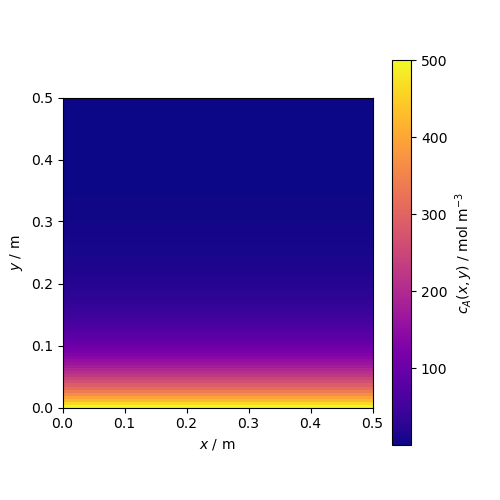

In [8]:
# Visualizamos la solución para la concentración de aroma en 2-D
fig = plt.subplots(figsize=[5,5])
plt.imshow(np.flipud(np.transpose(cA1)), origin="upper", extent =[0, Lx,0,Ly], cmap = "plasma")
plt.colorbar(label=r"$c_A(x,y)$ / mol m$^{-3}$")
plt.xlabel(r'$x$ / m')
plt.ylabel(r'$y$ / m')

plt.show()

#### Bibliografía:

1. [Imperial College London, 2020, Successive over-relaxation method, Primer in Computational Mathematics, Earth Science and Engineering Department, ](https://primer-computational-mathematics.github.io/book/c_mathematics/numerical_methods/6_Solving_PDEs_SOR.html)
